In [7]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15, 10]

In [15]:
# Load CSV file into Dataframe
sf_data_2016 = pd.read_csv('../../../../DataScience/Crime/SFPD_Crime_2016.csv', index_col=0)
sf_data_2015 = pd.read_csv('../../../../DataScience/Crime/SFPD_Crime_2015.csv', index_col=0)

/Users/nathan.nguyen/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [9]:
def generate_heatmap(data_set, title):
    
    # Assign SF DF series to sf_location
    sf_location = data_set['Location']
    sf_loc_tuple_list = []
    
    # Iterate through series
    for loc in sf_location:
    
        # Parse, split, and convert string to tuple of floats
        loc = loc[1:-1]
        yloc, xloc = loc.split(', ')
        sf_loc_tuple_list.append((float(xloc), float(yloc)))
        
    # Load SF city image
    sf_img = plt.imread('../Img/SF.png')

    # Empty X & Y coordinate list
    x_loc = []
    y_loc = []

    # Iterate through coordinate list
    for item in sf_loc_tuple_list:
        if(item[1] > 38):
            pass
        else:
            x_loc.append(item[0])
            y_loc.append(item[1])

    # Create heatmap of SF City
    plt.hist2d(x_loc, y_loc, bins=40, cmap='hot')
    plt.colorbar()
    plt.imshow(sf_img, extent=[min(x_loc), max(x_loc), min(y_loc), max(y_loc)], alpha=.3)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(title)
    plt.show()

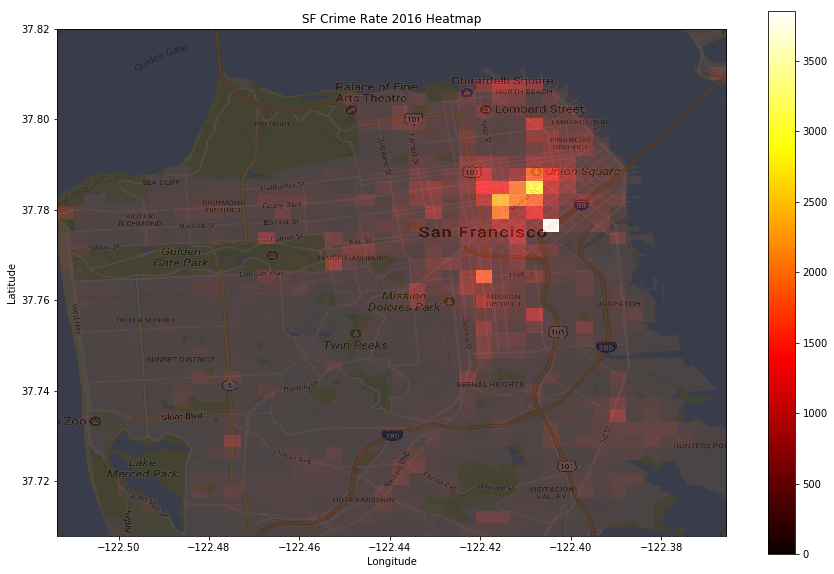

In [10]:
generate_heatmap(sf_data_2016, "SF Crime Rate 2016 Heatmap")

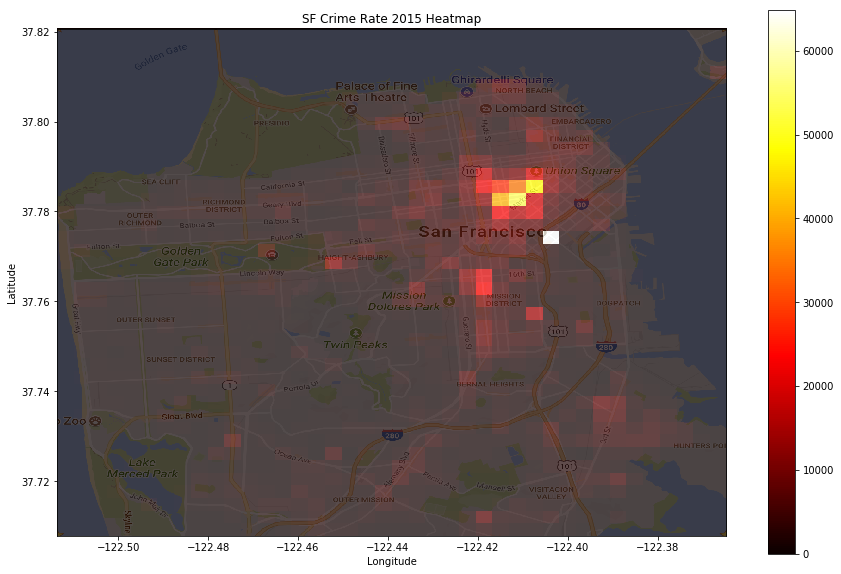

In [11]:
generate_heatmap(sf_data_2015, "SF Crime Rate 2015 Heatmap")

In [12]:
# Assign SF DF date series into a list
sf_date = list(sf_data_2016['Date'])

# Formate date str to dt object
for date in sf_date:
    date_dt = datetime.strptime(date, '%m/%d/%Y %H:%M:%S %p')
    
# Assign SF DF time series into a list
sf_time = list(sf_data_2016['Time'])
sf_time_list = []

# Formate time list and append to sf_time_list
for time in sf_time:
    time_dt = datetime.strptime(time, '%H:%M')
    sf_time_list.append(time_dt.time())

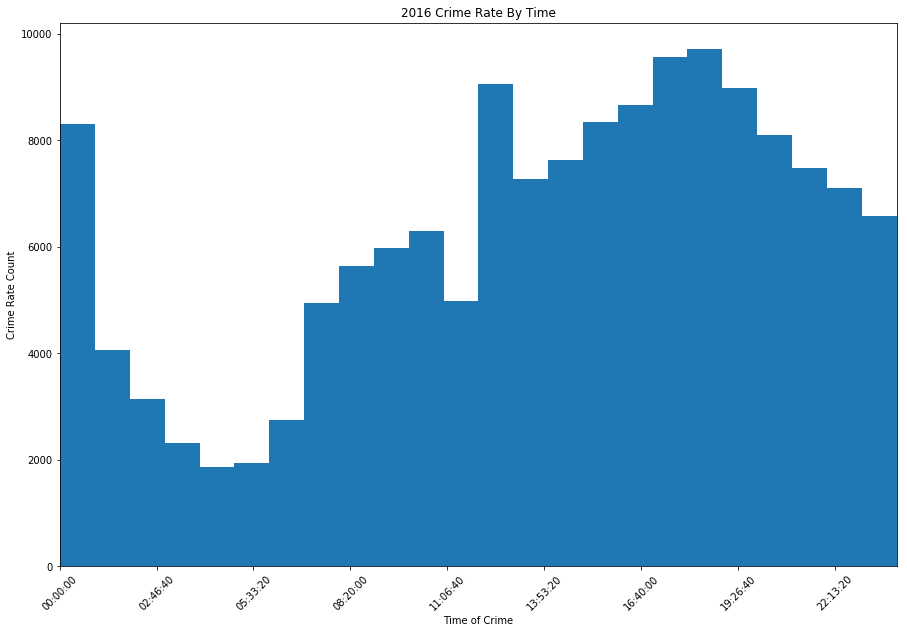

In [13]:
# Create histogram of Crime Rate
y, x, sf_hist = plt.hist(sf_time_list, bins=24)
plt.title("2016 Crime Rate By Time")
plt.xlabel("Time of Crime")
plt.xlim([0, max(sf_time_list)])
plt.xticks(rotation = 45)
plt.ylabel("Crime Rate Count")
plt.show()

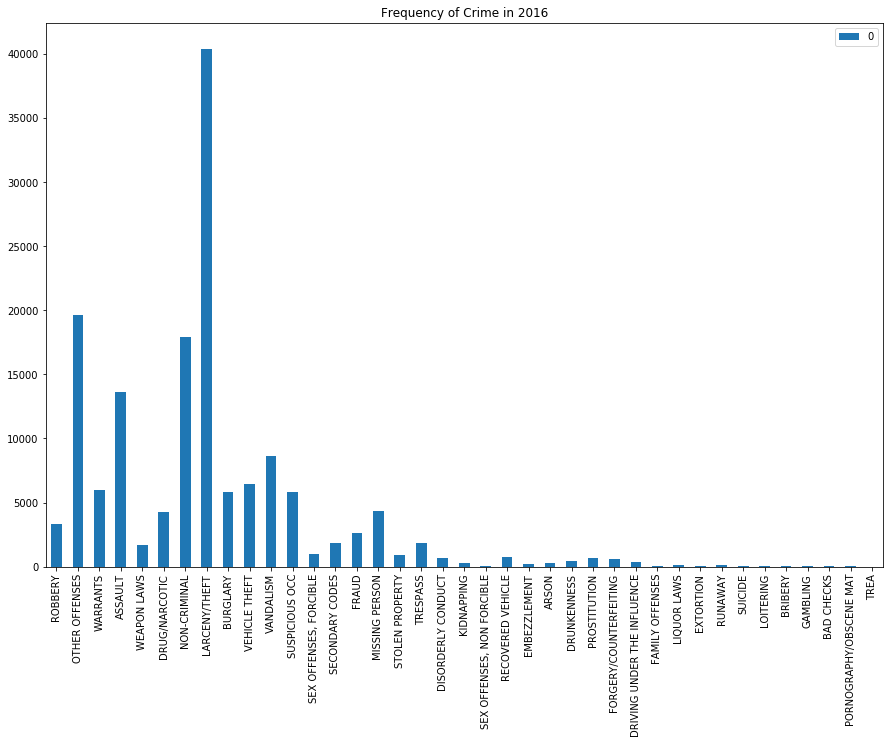

In [14]:
# Create counter dict using Category series
sf_crime_count = Counter(sf_data_2016['Category'])

# Plot out the types and frequency of crimes
df = pd.DataFrame.from_dict(sf_crime_count, orient='index')
df.plot(kind='bar', title='Frequency of Crime in 2016')